# Exercise 7: Support Vector Machines
In this exercise, we will explore SVM kernels and study the effect of the hyperparameters on a toy dataset. 

In [1]:
# Required libraries
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import svm

### **Data**
 

In the assignment .zip file, you can find a .csv file called toy_dataset.csv.

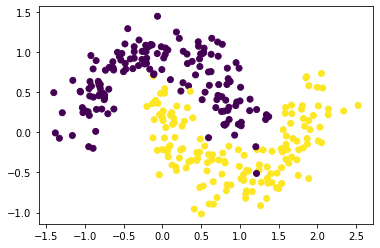

all data:

           x1        x2    y
0    1.479152 -0.508485  1.0
1    1.873464 -0.145003  1.0
2    0.993839 -0.423267  1.0
3    0.337859  0.581462  0.0
4    0.039939  1.054430  0.0
..        ...       ...  ...
295 -0.855896  0.897067  0.0
296  0.868556  0.636230  0.0
297  0.595830 -0.065734  0.0
298  1.416192 -0.234840  1.0
299  0.794619  0.098681  0.0

[300 rows x 3 columns]
features:

           x1        x2
0    1.479152 -0.508485
1    1.873464 -0.145003
2    0.993839 -0.423267
3    0.337859  0.581462
4    0.039939  1.054430
..        ...       ...
295 -0.855896  0.897067
296  0.868556  0.636230
297  0.595830 -0.065734
298  1.416192 -0.234840
299  0.794619  0.098681

[300 rows x 2 columns]
labels:

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
295    0.0
296    0.0
297    0.0
298    1.0
299    0.0
Name: y, Length: 300, dtype: float64


In [21]:
### ToDo
## Import the data

data = pd.read_csv("C:\\Users\\20205256\\OneDrive - TU Eindhoven\\Desktop\\2IIG0\\HW1\\HW1\\toy_dataset.csv");

# We also split the data:
feature_df = data.iloc[:, :-1];
label_df = data.iloc[:,-1];

## Visualize the data to explore it
plt.scatter(data.x1, data.x2, c=data.y);
plt.show();

print("all data:\n");
print(data);
print("features:\n");
print(feature_df);
print("labels:\n");
print(label_df);


In [13]:
## Helper function to plot the decision boundary of a classifier. 
def plot_decision_svm(X, y, clf, kernel_name = 'Linear'):

  # X -- The data points
  # y -- The labels
  # clf -- The classifier
  # Kernel_name -- name of the kernel: string Linear, poly, RBF
  ax = plt.subplot(1, 1, 1)
  h = 0.05 # step size
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot the points
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr,
              edgecolors='k')

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  #ax.set_xticks(())
  #ax.set_yticks(())

  ax.set_title(kernel_name)
  plt.tight_layout()
  plt.show()

In [14]:
# Helper function to visualize the results of a grid search with the two hyperparameters of rbf kernel as a heatmap
def heatmap(grid):
    """
    grid --  GridSearchCV instance  
    """
    pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
        values='mean_test_score', index='param_C', columns='param_gamma')
    ax = sns.heatmap(pvt, annot=True)
    ax.invert_yaxis()

### Compare SVM Kernels
 


*   Fit  SVM  with  linear,  polynomial  and  RBF  kernels  with  default parameter values


*   Plot the decision boundary for each kernel with the helper function.

*   Interpret the plots and compare the behavior of the three kernels.

In [23]:
##ToDo
#Fit different kernels 

linear_svm = svm.SVC(kernel="linear");
linear_svm.fit(feature_df, label_df);

poly_svm = svm.SVC(kernel="poly");
poly_svm.fit(feature_df, label_df);

rbf_svm = svm.SVC(kernel="rbf");
rbf_svm.fit(feature_df, label_df);

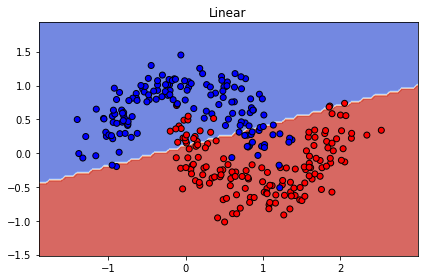

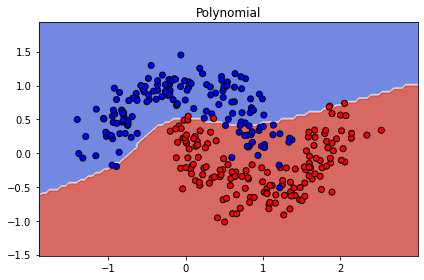

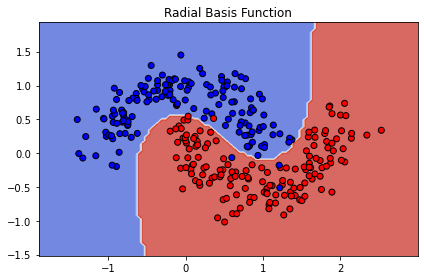

In [35]:
#Plot the decision boundary

# Converting dataframes to arrays:
feature_arr = feature_df.to_numpy();
label_arr = label_df.to_numpy();

#plotting linear boundary:
plot_decision_svm(feature_arr, label_arr, linear_svm, 'Linear');

#plotting polynomial boundary:
plot_decision_svm(feature_arr, label_arr, poly_svm, 'Polynomial');

#plotting radial basis function boundary:
plot_decision_svm(feature_arr, label_arr, rbf_svm, 'Radial Basis Function');

#Plot the decision boundary

#plotting linear boundary:


### Optimize rbf Kernel
 

* Create a grid with the following values: {
         
                        'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 2],
                        
                         'C': [1e-2, 1e-1, 1, 2, 5, 10]}
* Use GridSearchCV with SVC(kernel='rbf') as classifier, and 3-fold-cross-validation(cv). 


In [42]:
##ToDo
candidate_grid = {'gamma':[1e-4, 1e-3, 1e-2, 1e-1, 1, 2], 'C':[1e-2, 1e-1, 1, 2, 5, 10]}

grid = GridSearchCV(svm.SVC(kernel="rbf"), candidate_grid, cv=3);
grid.fit(feature_df, label_df);


*   Plot a heatmap of the results using the provided helper function.

*   Interpret the heatmap. Analyze the effect of different values of hyperparameters. Does any combination of C and $\gamma$ leads to underfitting or overfitting?
*    Report the accuracy of the best model you get. State the hyperparameters used.

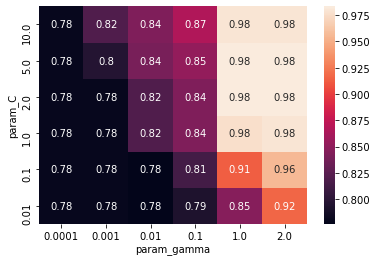

In [43]:
##ToDo
#Plot headmap of the result
heatmap(grid);


Choosing a very low value for $C$ decreases the model's performance (especially when paired with a low value for $\gamma$). This indicates underfitting, since a low value for $C$ means that the parameters of the model are heavily regularized. This causes only a small amount of the parameters to have a non-zero value, meaning the model complexity is too low to fit to the data.